In [1]:
# Mount GDRIVE jika menggunakan Google Collab
from google.colab import drive
drive.mount('/content/drive')

PATH = '/content/drive/MyDrive/Source Code/'

# Jika tidak menggunakan google collab
# PATH = ''

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

## Membaca Dataset Hasil Preprocessing

In [3]:
data = pd.read_csv(PATH + 'hasil_preprocessing.csv', delimiter=',')
data

,sentimen,Tweet,casefolding,cleaning,stopwords,stemming
0,-1,lagu bosan apa yang aku save ni huhuhuhuhuhuhu...,lagu bosan apa yang aku save ni huhuhuhuhuhuhu...,lagu bosan yang save,lagu bosan save,lagu bosan save
1,-1,kita lanjutkan saja diam ini hingga kau dan ak...,kita lanjutkan saja diam ini hingga kau dan ak...,kita lanjutkan saja diam ini hingga kau dan m...,lanjutkan diam mengerti hati,lanjut diam erti hati
2,1,doa rezeki tak putus inna haa zaa larizquna ma...,doa rezeki tak putus inna haa zaa larizquna ma...,doa rezeki tak putus inna haa larizquna maa l...,doa rezeki putus inna haa larizquna maa lahu ...,doa rezeki putus inna haa larizquna maa lahu m...
3,1,makasih loh ntar kita bagi hasil aku 99 9 sisa...,makasih loh ntar kita bagi hasil aku 99 9 sisa...,makasih loh ntar kita bagi hasil sisanya buat...,makasih loh ntar hasil sisanya,makasih loh ntar hasil sisa
4,-1,aku tak faham betul jenis orang malaysia yang ...,aku tak faham betul jenis orang malaysia yang ...,tak faham betul jenis orang malaysia yang tak...,faham jenis orang malaysia reti nak sangkut h...,faham jenis orang malaysia ret nak sangkut hos...
...,...,...,...,...,...,...
10801,1,Jangan membandingkan kehidupanmu dengan kehidu...,jangan membandingkan kehidupanmu dengan kehidu...,jangan dengan kehidupan orang lain karena se...,kehidupan orang memiliki karunia,hidup orang milik karunia
10802,0,Sini uname lu ntar gua follow,sini uname lu ntar gua follow,sini uname ntar gua follow,uname ntar gua follow,uname ntar gua follow
10803,1,Apapun yg telah kamu lakukan apapun kesalahanm...,apapun yg telah kamu lakukan apapun kesalahanm...,telah kamu lakukan kamu selalu menemukan ...,lakukan menemukan maaf hati botkece,laku temu maaf hati botkece
10804,1,3 cara untuk ingat semula apa yang kita dah ha...,3 cara untuk ingat semula apa yang kita dah ha...,cara untuk ingat semula yang kita dah hafal,dah hafal,dah hafal


In [4]:
data['sentimen'] = data['sentimen'].map({-1: 'Negatif', 0: 'Netral', 1: 'Positif'})
data

,sentimen,Tweet,casefolding,cleaning,stopwords,stemming
0,Negatif,lagu bosan apa yang aku save ni huhuhuhuhuhuhu...,lagu bosan apa yang aku save ni huhuhuhuhuhuhu...,lagu bosan yang save,lagu bosan save,lagu bosan save
1,Negatif,kita lanjutkan saja diam ini hingga kau dan ak...,kita lanjutkan saja diam ini hingga kau dan ak...,kita lanjutkan saja diam ini hingga kau dan m...,lanjutkan diam mengerti hati,lanjut diam erti hati
2,Positif,doa rezeki tak putus inna haa zaa larizquna ma...,doa rezeki tak putus inna haa zaa larizquna ma...,doa rezeki tak putus inna haa larizquna maa l...,doa rezeki putus inna haa larizquna maa lahu ...,doa rezeki putus inna haa larizquna maa lahu m...
3,Positif,makasih loh ntar kita bagi hasil aku 99 9 sisa...,makasih loh ntar kita bagi hasil aku 99 9 sisa...,makasih loh ntar kita bagi hasil sisanya buat...,makasih loh ntar hasil sisanya,makasih loh ntar hasil sisa
4,Negatif,aku tak faham betul jenis orang malaysia yang ...,aku tak faham betul jenis orang malaysia yang ...,tak faham betul jenis orang malaysia yang tak...,faham jenis orang malaysia reti nak sangkut h...,faham jenis orang malaysia ret nak sangkut hos...
...,...,...,...,...,...,...
10801,Positif,Jangan membandingkan kehidupanmu dengan kehidu...,jangan membandingkan kehidupanmu dengan kehidu...,jangan dengan kehidupan orang lain karena se...,kehidupan orang memiliki karunia,hidup orang milik karunia
10802,Netral,Sini uname lu ntar gua follow,sini uname lu ntar gua follow,sini uname ntar gua follow,uname ntar gua follow,uname ntar gua follow
10803,Positif,Apapun yg telah kamu lakukan apapun kesalahanm...,apapun yg telah kamu lakukan apapun kesalahanm...,telah kamu lakukan kamu selalu menemukan ...,lakukan menemukan maaf hati botkece,laku temu maaf hati botkece
10804,Positif,3 cara untuk ingat semula apa yang kita dah ha...,3 cara untuk ingat semula apa yang kita dah ha...,cara untuk ingat semula yang kita dah hafal,dah hafal,dah hafal


Menampilkan informasi data.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10806 entries, 0 to 10805
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sentimen     10806 non-null  object
 1   Tweet        10806 non-null  object
 2   casefolding  10806 non-null  object
 3   cleaning     10780 non-null  object
 4   stopwords    10706 non-null  object
 5   stemming     10618 non-null  object
dtypes: object(6)
memory usage: 506.7+ KB


Menampilkan jumlah data Null setiap kolom.

In [6]:
data.isnull().sum()

,0
sentimen,0
Tweet,0
casefolding,0
cleaning,26
stopwords,100
stemming,188


Menghapus data jika dalam satu baris terdapat data Null.

In [7]:
data = data.dropna().reset_index(drop=True)

In [8]:
data.isnull().sum()

,0
sentimen,0
Tweet,0
casefolding,0
cleaning,0
stopwords,0
stemming,0


Menampilkan jumlah data masing-masing label.

In [9]:
data['sentimen'].value_counts()

,count
sentimen,
Netral,5228
Negatif,2851
Positif,2539


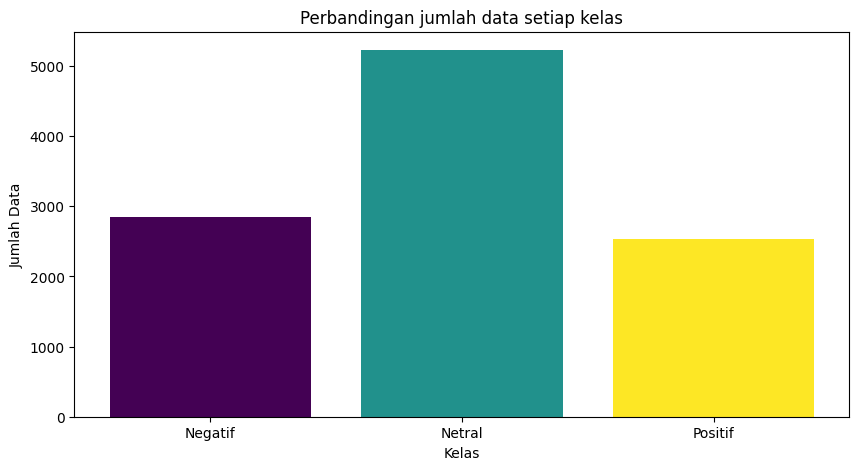

In [10]:
names = data.groupby(['sentimen']).size().index.to_list()
values = data.groupby(['sentimen']).size().to_list()

# Menghasilkan warna menggunakan colormap
num_colors = len(names)
colors = cm.viridis(np.linspace(0, 1, num_colors))

plt.figure(figsize=(10, 5))
plt.bar(names, values, color=colors)
plt.xlabel('Kelas')
plt.ylabel('Jumlah Data')
plt.title('Perbandingan jumlah data setiap kelas')
plt.show()

## Membagi data menjadi training dan testing

In [12]:
# 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(data['stemming'], data['sentimen'], test_size=0.2, random_state=42)

print('Jumlah data train :', X_train.shape[0])
print('Jumlah data test  :', X_test.shape[0])

Jumlah data train : 8494
Jumlah data test  : 2124


## Analisis sentimen menggunakan IndoBert

In [13]:
df_test = X_test.to_frame().reset_index(drop=True)
df_test.columns = ['Tweet']
df_test['sentimen'] = y_test.values
df_test

,Tweet,sentimen
0,malu ketiak hitam cream impo thailand,Netral
1,tunggu,Netral
2,jenis reply chat orang cepat nak mampus orang ...,Negatif
3,dear igot heres present for you dengar baru ki...,Netral
4,yah telat udh gblh ikut,Negatif
...,...,...
2119,udah main bosan lari kesana,Netral
2120,dok usha dah tau beli sis beli online jee hihi,Netral
2121,selamat batik nasional mari kuat identitas ban...,Positif
2122,iphone mahal market price power negara ringgit...,Negatif


In [14]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

model_path = PATH + "./my_indobert_sentimen"
model      = AutoModelForSequenceClassification.from_pretrained(model_path)
tokenizer  = AutoTokenizer.from_pretrained(model_path)

In [15]:
model.eval()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(50000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [16]:
import torch

def predict(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
    return torch.argmax(probs).item()

In [17]:
# Terapkan ke data test
df_test['hasil_sentimen'] = df_test['Tweet'].apply(predict)
df_test

,Tweet,sentimen,hasil_sentimen
0,malu ketiak hitam cream impo thailand,Netral,1
1,tunggu,Netral,1
2,jenis reply chat orang cepat nak mampus orang ...,Negatif,0
3,dear igot heres present for you dengar baru ki...,Netral,1
4,yah telat udh gblh ikut,Negatif,0
...,...,...,...
2119,udah main bosan lari kesana,Netral,0
2120,dok usha dah tau beli sis beli online jee hihi,Netral,1
2121,selamat batik nasional mari kuat identitas ban...,Positif,2
2122,iphone mahal market price power negara ringgit...,Negatif,1


In [18]:
df_test['hasil_sentimen'] = df_test['hasil_sentimen'].map({0: 'Negatif', 1: 'Netral', 2: 'Positif'})
df_test

,Tweet,sentimen,hasil_sentimen
0,malu ketiak hitam cream impo thailand,Netral,Netral
1,tunggu,Netral,Netral
2,jenis reply chat orang cepat nak mampus orang ...,Negatif,Negatif
3,dear igot heres present for you dengar baru ki...,Netral,Netral
4,yah telat udh gblh ikut,Negatif,Negatif
...,...,...,...
2119,udah main bosan lari kesana,Netral,Negatif
2120,dok usha dah tau beli sis beli online jee hihi,Netral,Netral
2121,selamat batik nasional mari kuat identitas ban...,Positif,Positif
2122,iphone mahal market price power negara ringgit...,Negatif,Netral


### Evaluasi Data Testing

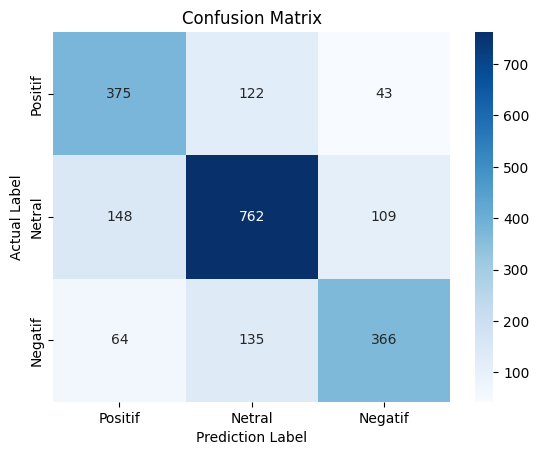

In [19]:
Confusion_matrix = confusion_matrix(df_test['sentimen'], df_test['hasil_sentimen'], labels=['Positif', 'Netral', 'Negatif'])
class_label      = ['Positif', 'Netral', 'Negatif']
df_confusion     = pd.DataFrame(Confusion_matrix, index = class_label, columns = class_label)

sns.heatmap(df_confusion, annot=True, fmt = "d", cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Prediction Label')
plt.ylabel('Actual Label')
plt.show()

In [20]:
_accuracy   = round(accuracy_score(df_test['sentimen'], df_test['hasil_sentimen'])*100, 2)
_precission = round(precision_score(df_test['sentimen'], df_test['hasil_sentimen'], average='weighted')*100, 2)
_recall     = round(recall_score(df_test['sentimen'], df_test['hasil_sentimen'], average='weighted')*100, 2)
_fscore     = round(f1_score(df_test['sentimen'], df_test['hasil_sentimen'], average='weighted')*100, 2)

print('Accuracy   =', _accuracy,'%')
print('Precission =', _precission,'%')
print('Recall     =', _recall,'%')
print('F1-Score   =', _fscore,'%')

Accuracy   = 70.76 %
Precission = 70.91 %
Recall     = 70.76 %
F1-Score   = 70.77 %


### Evaluasi Untuk Semua Data

In [26]:
# Terapkan ke semua data
data['hasil_sentimen'] = data['stemming'].apply(predict)
data

,sentimen,Tweet,casefolding,cleaning,stopwords,stemming,hasil_sentimen
0,Negatif,lagu bosan apa yang aku save ni huhuhuhuhuhuhu...,lagu bosan apa yang aku save ni huhuhuhuhuhuhu...,lagu bosan yang save,lagu bosan save,lagu bosan save,0
1,Negatif,kita lanjutkan saja diam ini hingga kau dan ak...,kita lanjutkan saja diam ini hingga kau dan ak...,kita lanjutkan saja diam ini hingga kau dan m...,lanjutkan diam mengerti hati,lanjut diam erti hati,0
2,Positif,doa rezeki tak putus inna haa zaa larizquna ma...,doa rezeki tak putus inna haa zaa larizquna ma...,doa rezeki tak putus inna haa larizquna maa l...,doa rezeki putus inna haa larizquna maa lahu ...,doa rezeki putus inna haa larizquna maa lahu m...,2
3,Positif,makasih loh ntar kita bagi hasil aku 99 9 sisa...,makasih loh ntar kita bagi hasil aku 99 9 sisa...,makasih loh ntar kita bagi hasil sisanya buat...,makasih loh ntar hasil sisanya,makasih loh ntar hasil sisa,2
4,Negatif,aku tak faham betul jenis orang malaysia yang ...,aku tak faham betul jenis orang malaysia yang ...,tak faham betul jenis orang malaysia yang tak...,faham jenis orang malaysia reti nak sangkut h...,faham jenis orang malaysia ret nak sangkut hos...,0
...,...,...,...,...,...,...,...
10613,Positif,Jangan membandingkan kehidupanmu dengan kehidu...,jangan membandingkan kehidupanmu dengan kehidu...,jangan dengan kehidupan orang lain karena se...,kehidupan orang memiliki karunia,hidup orang milik karunia,2
10614,Netral,Sini uname lu ntar gua follow,sini uname lu ntar gua follow,sini uname ntar gua follow,uname ntar gua follow,uname ntar gua follow,1
10615,Positif,Apapun yg telah kamu lakukan apapun kesalahanm...,apapun yg telah kamu lakukan apapun kesalahanm...,telah kamu lakukan kamu selalu menemukan ...,lakukan menemukan maaf hati botkece,laku temu maaf hati botkece,2
10616,Positif,3 cara untuk ingat semula apa yang kita dah ha...,3 cara untuk ingat semula apa yang kita dah ha...,cara untuk ingat semula yang kita dah hafal,dah hafal,dah hafal,1


In [28]:
data['hasil_sentimen'] = data['hasil_sentimen'].map({0: 'Negatif', 1: 'Netral', 2: 'Positif'})
data

,sentimen,Tweet,casefolding,cleaning,stopwords,stemming,hasil_sentimen
0,Negatif,lagu bosan apa yang aku save ni huhuhuhuhuhuhu...,lagu bosan apa yang aku save ni huhuhuhuhuhuhu...,lagu bosan yang save,lagu bosan save,lagu bosan save,Negatif
1,Negatif,kita lanjutkan saja diam ini hingga kau dan ak...,kita lanjutkan saja diam ini hingga kau dan ak...,kita lanjutkan saja diam ini hingga kau dan m...,lanjutkan diam mengerti hati,lanjut diam erti hati,Negatif
2,Positif,doa rezeki tak putus inna haa zaa larizquna ma...,doa rezeki tak putus inna haa zaa larizquna ma...,doa rezeki tak putus inna haa larizquna maa l...,doa rezeki putus inna haa larizquna maa lahu ...,doa rezeki putus inna haa larizquna maa lahu m...,Positif
3,Positif,makasih loh ntar kita bagi hasil aku 99 9 sisa...,makasih loh ntar kita bagi hasil aku 99 9 sisa...,makasih loh ntar kita bagi hasil sisanya buat...,makasih loh ntar hasil sisanya,makasih loh ntar hasil sisa,Positif
4,Negatif,aku tak faham betul jenis orang malaysia yang ...,aku tak faham betul jenis orang malaysia yang ...,tak faham betul jenis orang malaysia yang tak...,faham jenis orang malaysia reti nak sangkut h...,faham jenis orang malaysia ret nak sangkut hos...,Negatif
...,...,...,...,...,...,...,...
10613,Positif,Jangan membandingkan kehidupanmu dengan kehidu...,jangan membandingkan kehidupanmu dengan kehidu...,jangan dengan kehidupan orang lain karena se...,kehidupan orang memiliki karunia,hidup orang milik karunia,Positif
10614,Netral,Sini uname lu ntar gua follow,sini uname lu ntar gua follow,sini uname ntar gua follow,uname ntar gua follow,uname ntar gua follow,Netral
10615,Positif,Apapun yg telah kamu lakukan apapun kesalahanm...,apapun yg telah kamu lakukan apapun kesalahanm...,telah kamu lakukan kamu selalu menemukan ...,lakukan menemukan maaf hati botkece,laku temu maaf hati botkece,Positif
10616,Positif,3 cara untuk ingat semula apa yang kita dah ha...,3 cara untuk ingat semula apa yang kita dah ha...,cara untuk ingat semula yang kita dah hafal,dah hafal,dah hafal,Netral


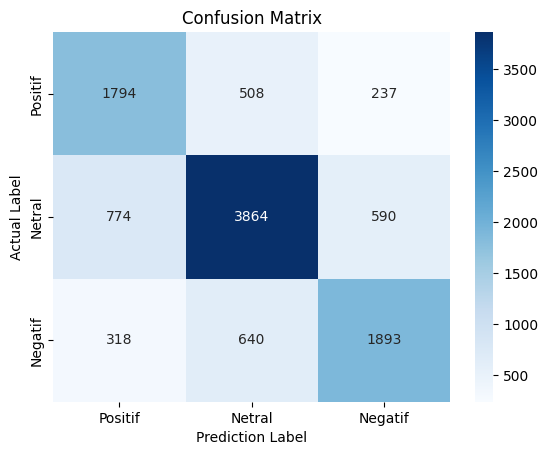

In [29]:
Confusion_matrix = confusion_matrix(data['sentimen'], data['hasil_sentimen'], labels=['Positif', 'Netral', 'Negatif'])
class_label      = ['Positif', 'Netral', 'Negatif']
df_confusion     = pd.DataFrame(Confusion_matrix, index = class_label, columns = class_label)

sns.heatmap(df_confusion, annot=True, fmt = "d", cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Prediction Label')
plt.ylabel('Actual Label')
plt.show()

In [30]:
_accuracy   = round(accuracy_score(data['sentimen'], data['hasil_sentimen'])*100, 2)
_precission = round(precision_score(data['sentimen'], data['hasil_sentimen'], average='weighted')*100, 2)
_recall     = round(recall_score(data['sentimen'], data['hasil_sentimen'], average='weighted')*100, 2)
_fscore     = round(f1_score(data['sentimen'], data['hasil_sentimen'], average='weighted')*100, 2)

print('Accuracy   =', _accuracy,'%')
print('Precission =', _precission,'%')
print('Recall     =', _recall,'%')
print('F1-Score   =', _fscore,'%')

Accuracy   = 71.12 %
Precission = 71.51 %
Recall     = 71.12 %
F1-Score   = 71.22 %


In [31]:
# Menyimpan data hasil analisis sentimen
df_test.to_csv(PATH+'data_test.csv', index=False)
data.to_csv(PATH+'data_hasil_sentimen.csv', index=False)